In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df= pd.read_csv('G:\(Data_files)\\hospital_data.csv')

In [4]:
df.head(2)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002


In [7]:
print('The shape of the dataset ',df.shape)

The shape of the dataset  (29999, 12)


In [8]:
df.columns

Index(['Date', ' Medication Revenue ', '  Lab Cost ', ' Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    29999 non-null  object
 1   Medication Revenue      29999 non-null  object
 2   Lab Cost                29999 non-null  object
 3   Consultation Revenue    29999 non-null  object
 4   Doctor Type             29999 non-null  object
 5   Financial Class         29999 non-null  object
 6   Patient Type            29999 non-null  object
 7   Entry Time              29999 non-null  object
 8   Post-Consultation Time  29999 non-null  object
 9   Completion Time         29999 non-null  object
 10  Doctor                  29999 non-null  object
 11  Patient ID              29999 non-null  object
dtypes: object(12)
memory usage: 2.7+ MB


In [15]:
# creating datetime columns
df['Date'] = pd.to_datetime(df['Date'])
df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time'],format='hr')
df['Entry Time'] = pd.to_datetime(df['Entry Time'])
df['Completion Time'] = pd.to_datetime(df['Completion Time'])

In [17]:
df.head(2)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,2022-11-04 08:35:45,2022-11-04 09:17:54,2022-11-04 09:29:46,DR05350C4,C10001
1,2019-11-06,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,2022-11-04 19:19:16,2022-11-04 21:02:36,2022-11-04 21:24:07,DR09451Z4,C10002


In [93]:
df.groupby(['Doctor Type'])[[ 'Medication Revenue', 'Lab Cost', 'Consultation Revenue']].agg(['sum','mean']).round(2)

Medication Revenue         Lab Cost       Consultation Revenue  \
                           sum   mean       sum  mean                  sum   
Doctor Type                                                                  
ANCHOR               465692.39  21.25  60907.84  2.78            317387.21   
FLOATING              24606.22  18.99   1299.58  1.00             20262.11   
LOCUM                128761.43  18.97   4662.81  0.69            120367.41   

                    
              mean  
Doctor Type         
ANCHOR       14.48  
FLOATING     15.63  
LOCUM        17.73

In [9]:
df['Financial Class'].unique()

array(['HMO', 'INSURANCE', 'MEDICARE', 'CORPORATE', 'PRIVATE'],
      dtype=object)

In [18]:
df['Patient Type'].value_counts()

OUTPATIENT    29999
Name: Patient Type, dtype: int64

In [19]:
df.drop(columns='Patient Type', inplace=True)

In [14]:
df.dtypes

Date                      object
 Medication Revenue       object
  Lab Cost                object
 Consultation Revenue     object
Doctor Type               object
Financial Class           object
Patient Type              object
Entry Time                object
Post-Consultation Time    object
Completion Time           object
Doctor                    object
Patient ID                object
dtype: object

In [18]:
df.Date

0         11/4/2019 0:00
1         11/6/2019 0:00
2         11/2/2019 0:00
3         11/6/2019 0:00
4         11/1/2019 0:00
              ...       
29994    11/13/2019 0:00
29995    11/13/2019 0:00
29996    11/13/2019 0:00
29997    11/13/2019 0:00
29998    11/13/2019 0:00
Name: Date, Length: 29999, dtype: object

In [35]:
df.columns

Index(['Date', ' Medication Revenue ', '  Lab Cost ', ' Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [3]:
df.columns=df.columns.str.strip()

In [4]:
df.columns

Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [14]:
df.Date = pd.to_datetime(df.Date)
df.columns=df.columns.str.strip()
df['Entry Time'] = pd.to_datetime(df['Entry Time'])
df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time'])
df['Completion Time'] = pd.to_datetime(df['Completion Time'])
df.dtypes

Date                      datetime64[ns]
Medication Revenue                object
Lab Cost                          object
Consultation Revenue              object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [20]:
def str_to_float(x):
    x = x.replace('$','')
    x = x.replace(',','')
    x = x.replace('-', '0')
    return float(x)

In [21]:
df['Medication Revenue'] = df['Medication Revenue'].apply(str_to_float)
df['Lab Cost'] = df['Lab Cost'].apply(str_to_float)
df['Consultation Revenue'] = df['Consultation Revenue'].apply(str_to_float)
df.dtypes

Date                      datetime64[ns]
Medication Revenue               float64
Lab Cost                         float64
Consultation Revenue             float64
Doctor Type                       object
Financial Class                   object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [22]:
df.head(2)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,2022-11-04 08:35:45,2022-11-04 09:17:54,2022-11-04 09:29:46,DR05350C4,C10001
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,2022-11-04 19:19:16,2022-11-04 21:02:36,2022-11-04 21:24:07,DR09451Z4,C10002


In [24]:
df['Total Revenue'] = df['Medication Revenue']+df['Lab Cost']+df['Consultation Revenue']

In [28]:
df.groupby('Doctor Type')['Total Revenue'].sum()

Doctor Type
ANCHOR      38.513619
FLOATING    35.623387
LOCUM       37.382774
Name: Total Revenue, dtype: float64

In [33]:
df.groupby('Financial Class')[['Medication Revenue', 'Lab Cost', 'Consultation Revenue']].mean().round(2)

,Medication Revenue,Lab Cost,Consultation Revenue
Financial Class,,,
CORPORATE,23.27,3.04,10.66
HMO,34.93,3.29,19.54
INSURANCE,30.93,0.96,14.59
MEDICARE,69.59,6.19,7.97
PRIVATE,0.00,2.44,17.98


In [27]:
df.groupby('Financial Class')['Total Revenue'].sum()

Financial Class
CORPORATE    255660.08
HMO          215925.07
INSURANCE    461539.69
MEDICARE      24539.28
PRIVATE      186282.88
Name: Total Revenue, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    29999 non-null  datetime64[ns]
 1   Medication Revenue      29999 non-null  float64       
 2   Lab Cost                29999 non-null  float64       
 3   Consultation Revenue    29999 non-null  float64       
 4   Doctor Type             29999 non-null  object        
 5   Financial Class         29999 non-null  object        
 6   Patient Type            29999 non-null  object        
 7   Entry Time              29999 non-null  datetime64[ns]
 8   Post-Consultation Time  29999 non-null  datetime64[ns]
 9   Completion Time         29999 non-null  datetime64[ns]
 10  Doctor                  29999 non-null  object        
 11  Patient ID              29999 non-null  object        
 12  Total Revenue           29999 non-null  float6

## What time has the most visitors?

In [34]:
df['Hour'] = df['Entry Time'].dt.hour

In [50]:
Patient_count = df.groupby(df['Hour'])['Patient ID'].count().to_frame().reset_index()
Patient_count.columns = ['hour','count']
Patient_count

,hour,count
0,7,12
1,8,3489
2,9,4297
3,10,3680
4,11,3306
5,12,1446
6,13,426
7,14,3030
8,15,1847
9,16,1249


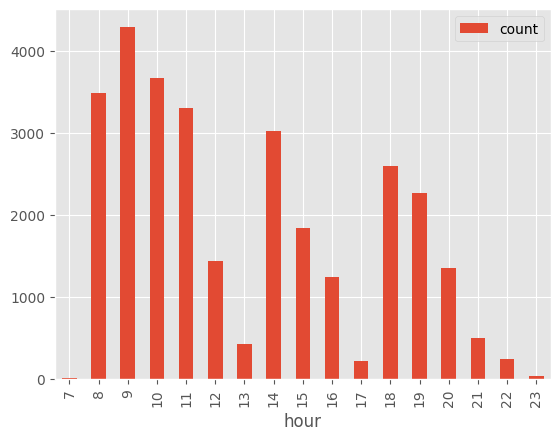

In [53]:
plt.style.use('ggplot')
Patient_count.plot(x= 'hour', y ='count', kind= 'bar' )
plt.grid('on')

In [67]:
pivot1

Hour
7       12
8     3489
9     4297
10    3680
11    3306
12    1446
13     426
14    3030
15    1847
16    1249
17     219
18    2600
19    2269
20    1358
21     500
22     238
23      33
Name: Patient ID, dtype: int64

<AxesSubplot:xlabel='Hour'>

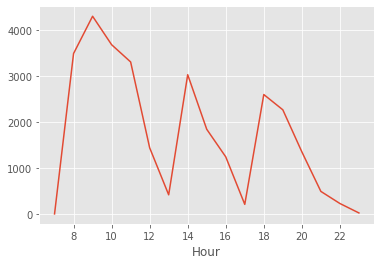

In [68]:
plt.style.use('ggplot')
pivot1.T.plot()

## Does the total revenue correlate with the total visitors

In [54]:
df.head(2)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,2022-11-04 08:35:45,2022-11-04 09:17:54,2022-11-04 09:29:46,DR05350C4,C10001,1213.39,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,2022-11-04 19:19:16,2022-11-04 21:02:36,2022-11-04 21:24:07,DR09451Z4,C10002,753.48,19


<AxesSubplot: xlabel='Hour'>

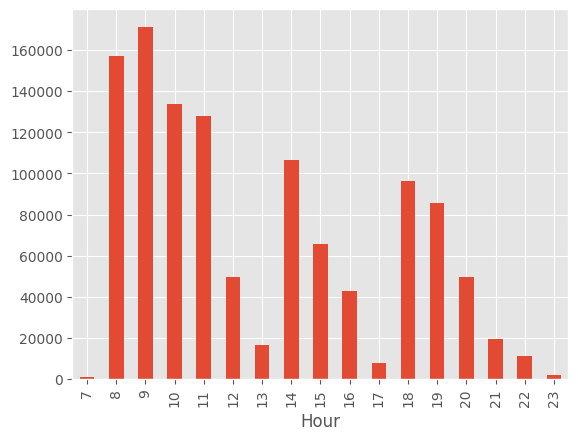

In [56]:
pivot2 = df.groupby(df['Hour'])['Total Revenue'].sum()
pivot2.plot(x= 'hour', y ='count', kind= 'bar' )
# plt.grid('on')

In [57]:
df.groupby(df['Hour'])['Total Revenue'].agg(['sum','mean'])

,sum,mean
Hour,,
7,1069.29,89.107500
8,157060.04,45.015775
9,171291.45,39.863032
10,134001.31,36.413399
11,127728.09,38.635236
12,49620.97,34.316024
13,16532.92,38.809671
14,106672.16,35.205333
15,65717.62,35.580736


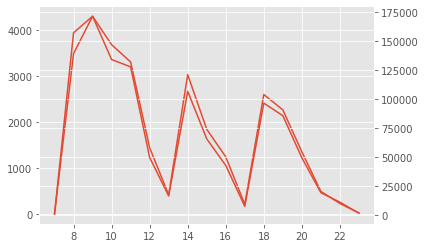

In [83]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(merge1.index, merge1['Patient ID'])
ax2.plot(merge1.index, merge1['Total Revenue'])

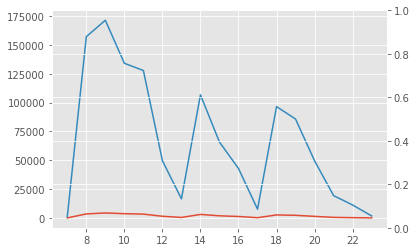

In [86]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(merge2.index, merge2['Patient ID'])
ax1.plot(merge2.index, merge2['Total Revenue_x'])

In [58]:
 df.groupby('Hour')[['Patient ID']].count()

,Patient ID
Hour,
7,12
8,3489
9,4297
10,3680
11,3306
12,1446
13,426
14,3030
15,1847


<Figure size 500x300 with 0 Axes>

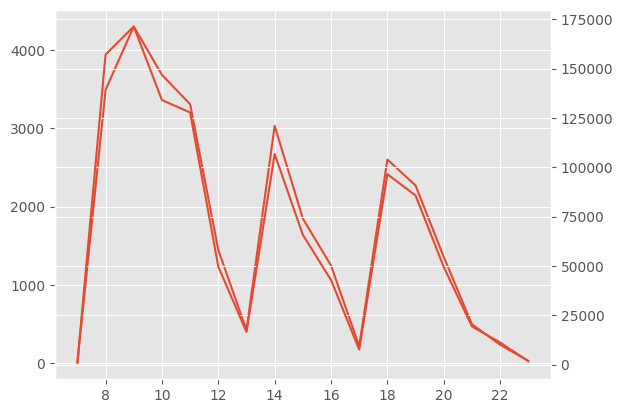

In [67]:
pivots = df.groupby('Hour').agg({'Total Revenue': 'sum', 'Patient ID':'count'})
plt.figure(figsize= (5,3))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(pivots.index, pivots['Patient ID'])
ax2.plot(pivots.index, pivots['Total Revenue'])

### What percentage of revenue come from different insurance types

In [83]:
pivots = df.groupby('Financial Class')['Total Revenue'].sum().round(2).to_frame()
pivots['percentage(%)'] = round(100 * df.groupby('Financial Class')['Total Revenue'].sum()/sum(df['Total Revenue']),2)
pivots

,Total Revenue,percentage(%)
Financial Class,,
CORPORATE,255660.08,22.35
HMO,215925.07,18.88
INSURANCE,461539.69,40.35
MEDICARE,24539.28,2.15
PRIVATE,186282.88,16.28
